In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [2]:
td=pd.read_csv('C:/Users/9/Downloads/titanic_data/train.csv')

In [3]:
td.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = td.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
y = td.Survived

In [9]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [10]:
X = pd.get_dummies(X)

In [11]:
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,NaN,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [13]:
X.Age.median()

28.0

In [14]:
X = X.fillna({'Age': X.Age.median()})

In [18]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [20]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

[Text(2443.5485795454542, 1325.025, 'Sex_male <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(916.8954545454544, 1257.075, 'Pclass <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(344.94545454545454, 1189.125, 'Fare <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(263.78181818181815, 1121.175, 'Fare <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(223.2, 1053.225, 'Age <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(182.6181818181818, 985.275, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(263.78181818181815, 985.275, 'Age <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(162.3272727272727, 917.325, 'Age <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(81.16363636363636, 849.375, 'Fare <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(40.58181818181818, 781.425, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(121.74545454545454, 781.425, 

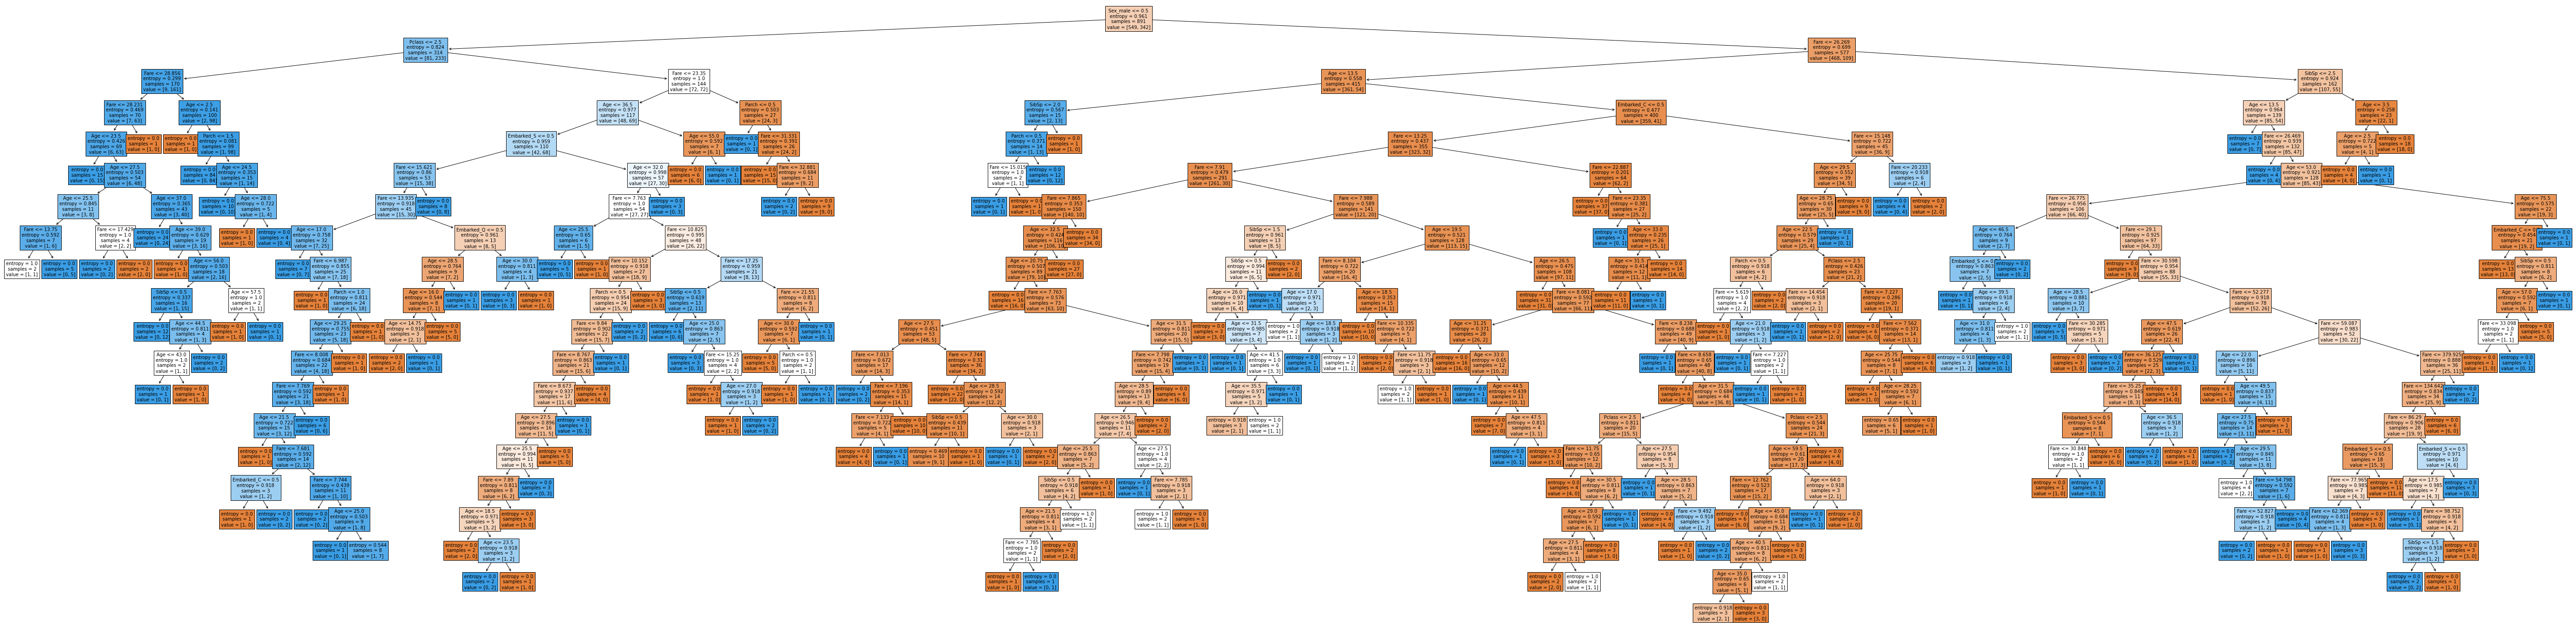

In [23]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train.shape

(596, 10)

In [28]:
X_test.shape

(295, 10)

In [31]:
clf.score(X, y)

0.9797979797979798

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
clf.fit(X_train, y_train).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [34]:
clf.score(X_train, y_train)

0.9798657718120806

In [35]:
clf.score(X_test, y_test)

0.7627118644067796

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)

In [37]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [39]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
clf.score(X_train, y_train)

0.8406040268456376

In [41]:
clf.score(X_test, y_test)

0.8101694915254237

In [42]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [43]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [44]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [45]:
clf.score(X_train, y_train)

0.8238255033557047

In [46]:
clf.score(X_test, y_test)

0.8203389830508474